# Context



This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


## Content


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

## Exploratory Data Analysis

In [4]:
# Dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Datset Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Number of patients without diabetes: 500
Number of patients with diabetes: 268


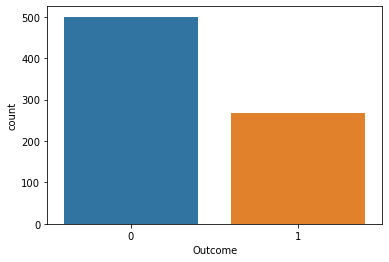

In [7]:
# Counting the output level
sns.countplot(data=df, x = 'Outcome', label='Count')
LD, NLD = df['Outcome'].value_counts()
print('Number of patients without diabetes: {}'.format(LD))
print('Number of patients with diabetes: {}'.format(NLD))

In [8]:
# Just Keeping a copy safe aside 
df_copy = df.copy(deep=True)


# We dont need this Output field for this Analysis 
df_copy.drop(['Outcome'],axis=1,inplace=True)


# lets see how many missing vales are there 
for features in df_copy.columns:
    print(f"{features:>{20}} : {df_copy[features].isnull().mean()} %")
    

         Pregnancies : 0.0 %
             Glucose : 0.0 %
       BloodPressure : 0.0 %
       SkinThickness : 0.0 %
             Insulin : 0.0 %
                 BMI : 0.0 %
                 DPF : 0.0 %
                 Age : 0.0 %


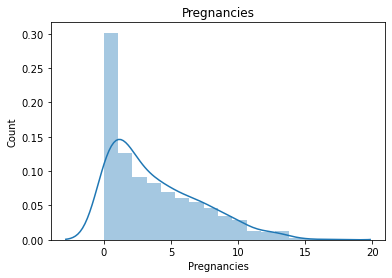

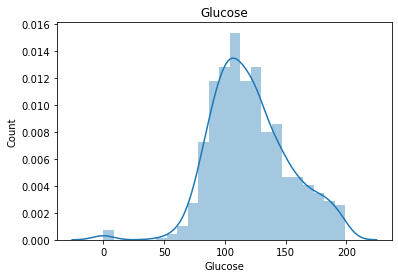

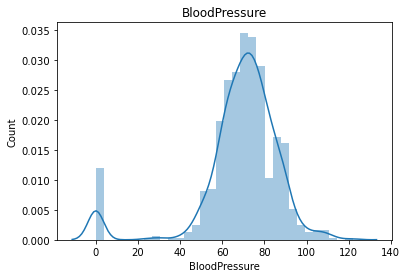

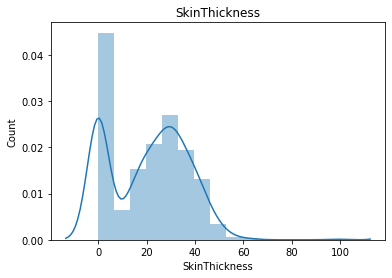

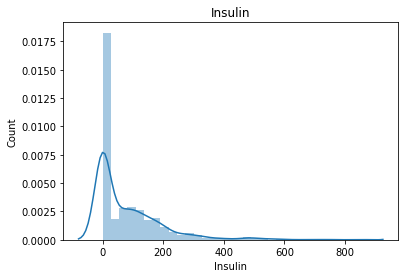

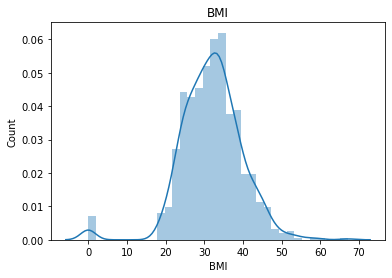

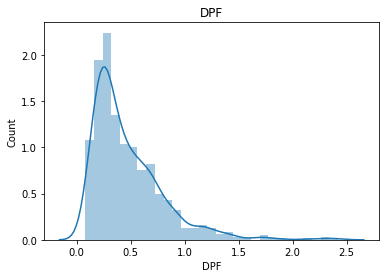

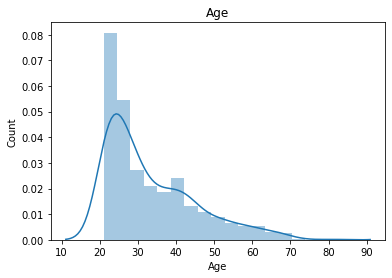

In [9]:
# lets get some ideas from the distribution of the features 
for feature in df_copy.columns:
    sns.distplot(df_copy[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

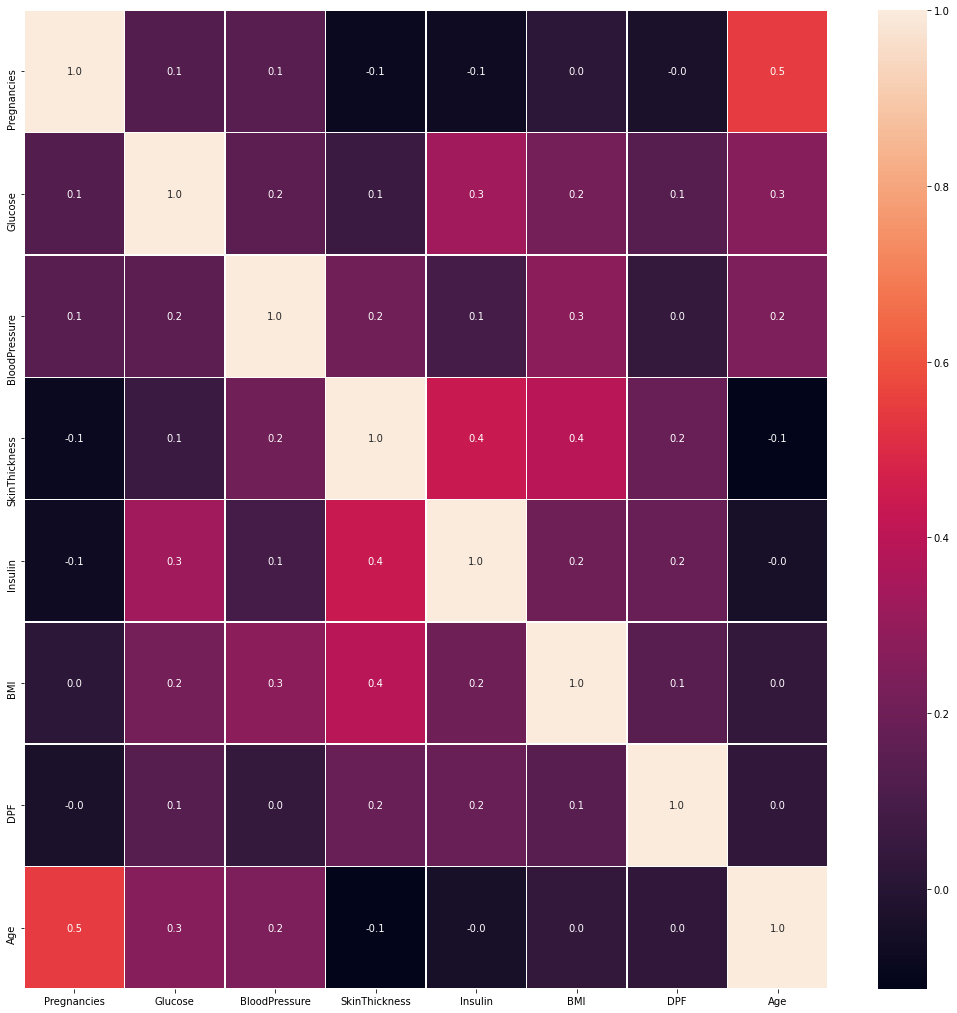

In [10]:
# Correlation Checking
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

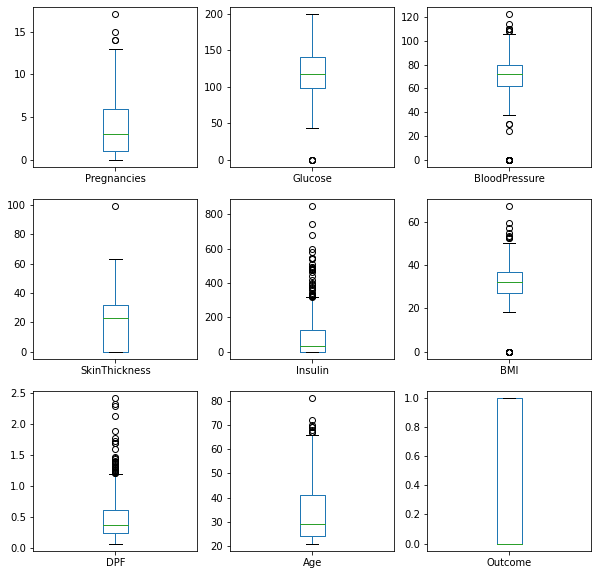

In [11]:
# Checking Outliers
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()


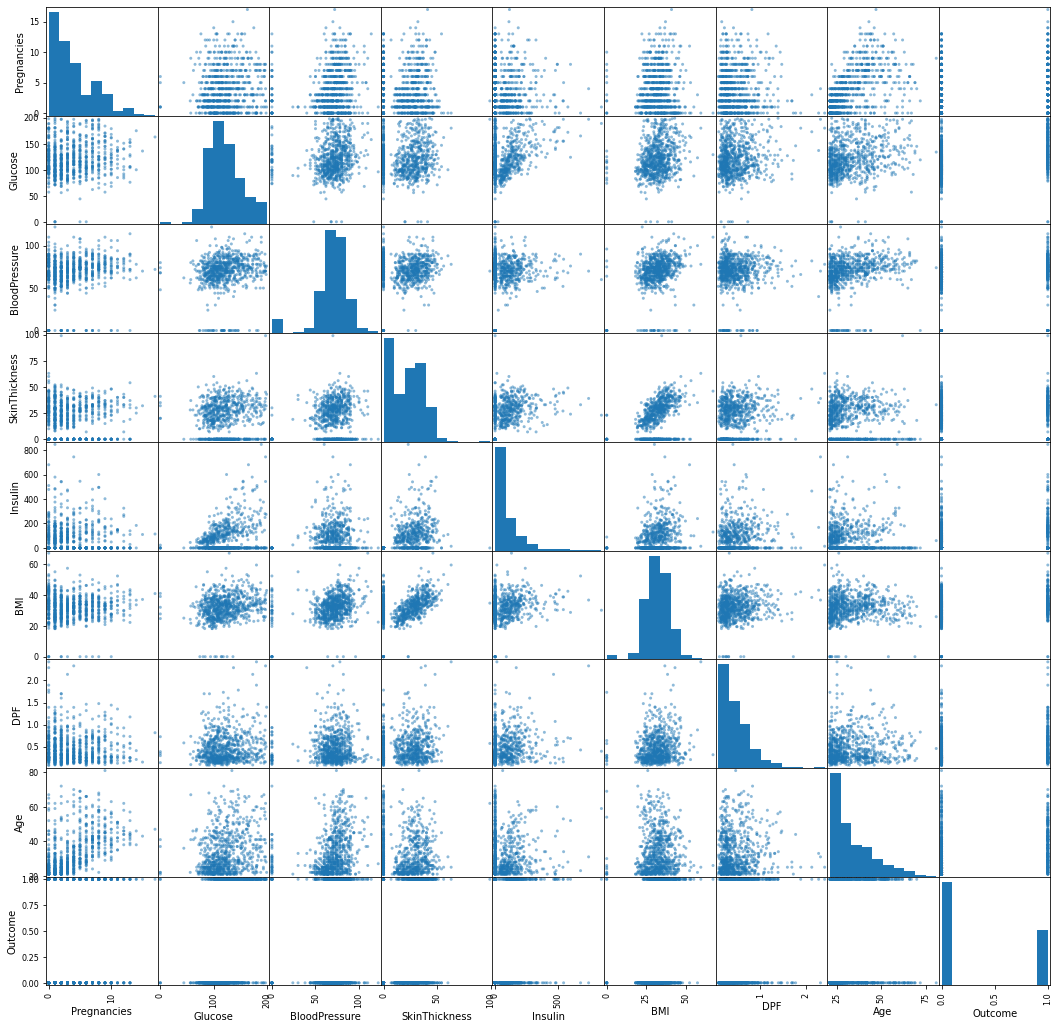

In [12]:
# Pairwise ScatterPlot
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

scatter_matrix(df ,figsize = (18,18))
pyplot.show()


### Zero Value Handling

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


# Replacing NaN value by mean, median depending upon distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)


### Output Encoding and Splitting the Data Set

In [14]:
# X, y division 
X = df.drop(columns='Outcome')
y = df['Outcome']


In [15]:
# Encoding output feature
y=pd.get_dummies(y, drop_first= True)
y

,1
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [16]:
# Splitting into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Modelling and Checking Accuracy 

### Logistic Regression

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print(accuracy)
print(recall)

0.8246753246753247
0.6808510638297872


C:\Users\ratul\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ratul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


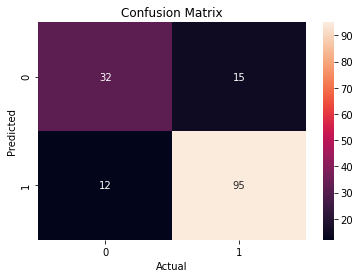

In [24]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred_lr, labels=[1,0])
sns.heatmap(matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [25]:
# classification report for precision,recall,f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_lr,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.68      0.70        47
           0       0.86      0.89      0.88       107

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



### Decision Tree

In [26]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print(accuracy)
print(recall)

0.7272727272727273
0.5319148936170213


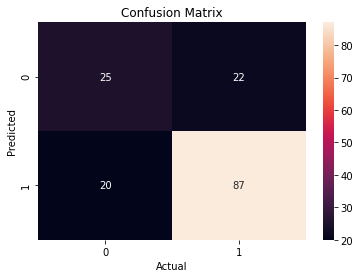

In [27]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred_dt, labels=[1,0])
sns.heatmap(matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
# classification report for precision,recall,f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_dt,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.53      0.54        47
           0       0.80      0.81      0.81       107

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154



### Random Forest

In [50]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
print(accuracy)
print(recall)

<ipython-input-50-564954dcdbeb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


0.8116883116883117
0.6382978723404256


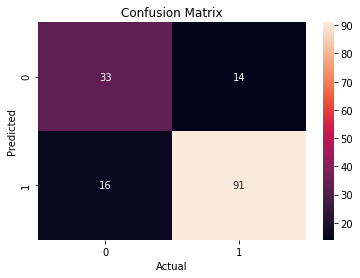

In [30]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred_rf, labels=[1,0])
sns.heatmap(matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [31]:
# classification report for precision,recall,f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_rf,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.70      0.69        47
           0       0.87      0.85      0.86       107

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.81      0.81      0.81       154



### Variable Importance

In [32]:
# summarize feature importance
importance = model_rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07401
Feature: 1, Score: 0.25737
Feature: 2, Score: 0.07952
Feature: 3, Score: 0.07279
Feature: 4, Score: 0.08703
Feature: 5, Score: 0.16649
Feature: 6, Score: 0.12285
Feature: 7, Score: 0.13994


### Gradient Boosting

In [51]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)
y_pred_gbm = model_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbm)
recall = recall_score(y_test, y_pred_gbm)
print(accuracy)
print(recall)

C:\Users\ratul\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8376623376623377
0.7659574468085106


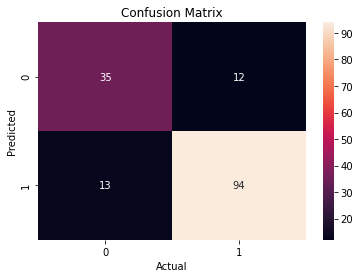

In [34]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred_gbm, labels=[1,0])
sns.heatmap(matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [35]:
# classification report for precision,recall,f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_gbm,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.74      0.74        47
           0       0.89      0.88      0.88       107

    accuracy                           0.84       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.84      0.84      0.84       154



### Hyper Parameter Tunning 

In [37]:
### GBM 
params={
 "learning_rate"    : [0.001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [1,2, 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators"     : [10,20,50,100],
 }
from sklearn.model_selection import GridSearchCV
Grid_model_gbm=GridSearchCV(model_gbm,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
Grid_model_gbm.fit(X_train, y_train)
Grid_model_gbm.best_params_

In [41]:
# Refitting the model 
model_gbm_bestfit = GradientBoostingClassifier(learning_rate=0.1,max_depth=1,n_estimators=50)
model_gbm_bestfit.fit(X_train, y_train)
y_pred_gbm_bestfit = model_gbm_bestfit.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_gbm_bestfit)
recall = recall_score(y_test, y_pred_gbm_bestfit)
print(accuracy)
print(recall)

0.7857142857142857
0.5319148936170213


C:\Users\ratul\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
### Random Forest 
params={
 "max_depth"        : [1,2, 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators"     : [10,20,50,100,200,250]
 }

from sklearn.model_selection import GridSearchCV
Grid_model_rf=GridSearchCV(model_rf,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
Grid_model_rf.fit(X_train, y_train)
Grid_model_rf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.0s finished
C:\Users\ratul\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 5, 'n_estimators': 250}

In [43]:
# Refitting the model 
model_rf_bestfit = RandomForestClassifier(max_depth=5,n_estimators=250)
model_rf_bestfit.fit(X_train, y_train)
y_pred_rf_bestfit = model_rf_bestfit.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_rf_bestfit)
recall = recall_score(y_test, y_pred_rf_bestfit)
print(accuracy)
print(recall)

<ipython-input-43-2b77fa599c87>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_bestfit.fit(X_train, y_train)


0.8051948051948052
0.5957446808510638


### ROC and AUC

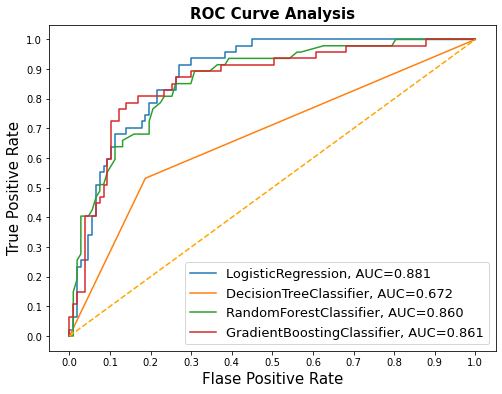

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [model_lr, 
               model_dt, 
               model_rf, 
               model_gbm,
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    #model = cls.fit(X_train, y_train)
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

## Plotting the ROC with their respective AUC :

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()